In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects
import seaborn as sns

# Data Visualization

### Load the data

In [26]:
df = pd.read_csv('dataset/spotify_songs_restructured_cleaned.csv', sep=',')
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_category,tempo_category,loudness_category,release_month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.000000,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,0.748000,0.916000,6.0,-6.713226,...,0.102000,0.000000,0.065300,0.5180,122.036,194754.0,Medium,Fast,Moderate,June
1,All the Time - Don Diablo Remix,Zara Larsson,70.000000,All the Time (Don Diablo Remix),2019-07-05,pop,0.675000,0.931000,1.0,-6.713226,...,0.079400,0.000023,0.110000,0.6130,124.008,176616.0,Medium,Fast,Moderate,July
2,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.000000,Call You Mine - The Remixes,2019-07-19,pop,0.718000,0.930000,7.0,-3.778000,...,0.028700,0.000009,0.204000,0.2770,121.956,169093.0,Medium,Fast,Loud,July
3,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67.000000,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,pop,0.675000,0.919000,8.0,-5.385000,...,0.079900,0.000000,0.191163,0.5850,124.982,163049.0,Medium,Fast,Moderate,July
4,Never Really Over - R3HAB Remix,Katy Perry,62.000000,Never Really Over (R3HAB Remix),2019-07-26,pop,0.449000,0.856000,5.0,-4.788000,...,0.176028,0.000000,0.176000,0.1520,112.648,187675.0,Medium,Moderate,Loud,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,Booyah - Radio Edit,Showtek,42.511265,Booyah,2013-01-01,edm,0.559000,0.916000,11.0,-3.050000,...,0.045300,0.000013,0.225000,0.1950,128.012,215295.0,Medium-Low,Fast,Loud,January
19651,Wasted,Tiësto,47.000000,Wasted,2014-04-22,edm,0.645000,0.698215,2.0,-5.595000,...,0.001060,0.002640,0.199000,0.3750,112.028,188371.0,Medium-Low,Moderate,Moderate,April
19652,City Of Lights - Official Radio Edit,Lush & Simon,42.511265,City Of Lights (Vocal Mix),2014-04-28,edm,0.428000,0.922000,2.0,-1.814000,...,0.076600,0.000000,0.066800,0.2100,128.170,204375.0,Medium-Low,Fast,Loud,April
19653,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20.000000,Closer Remixed,2013-03-08,edm,0.654843,0.786000,0.0,-4.462000,...,0.001710,0.004270,0.375000,0.4000,128.041,353120.0,Low,Fast,Loud,March


### Popularity Distribution over genres

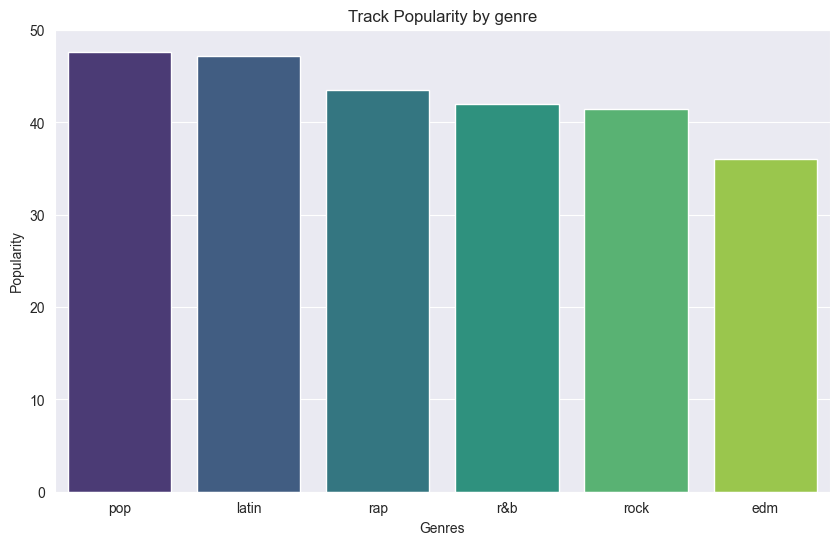

In [27]:
data = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False)

plt.title('Track Popularity by genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

plt.show()

### Popularity Distribution over months

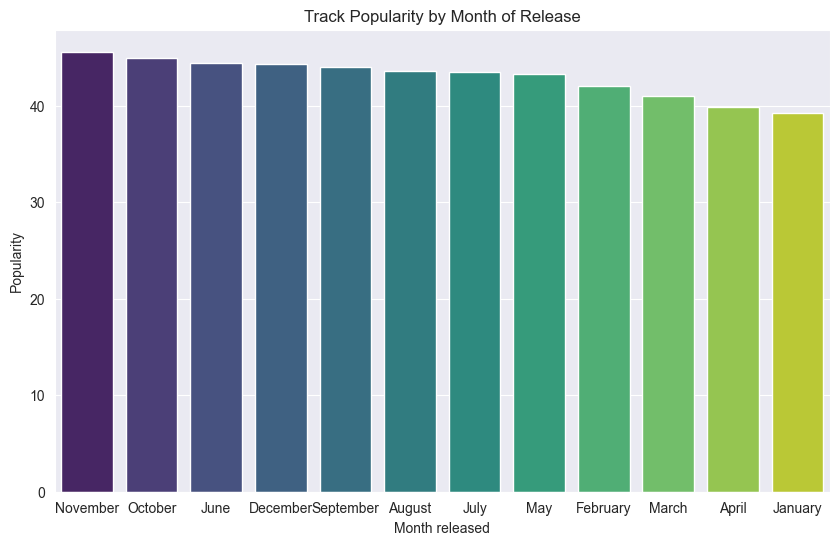

In [28]:
data = df.groupby('release_month')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False
            )

plt.title('Track Popularity by Month of Release')
plt.xlabel('Month released')
plt.ylabel('Popularity')

plt.show()

### Total Tracks per Genre

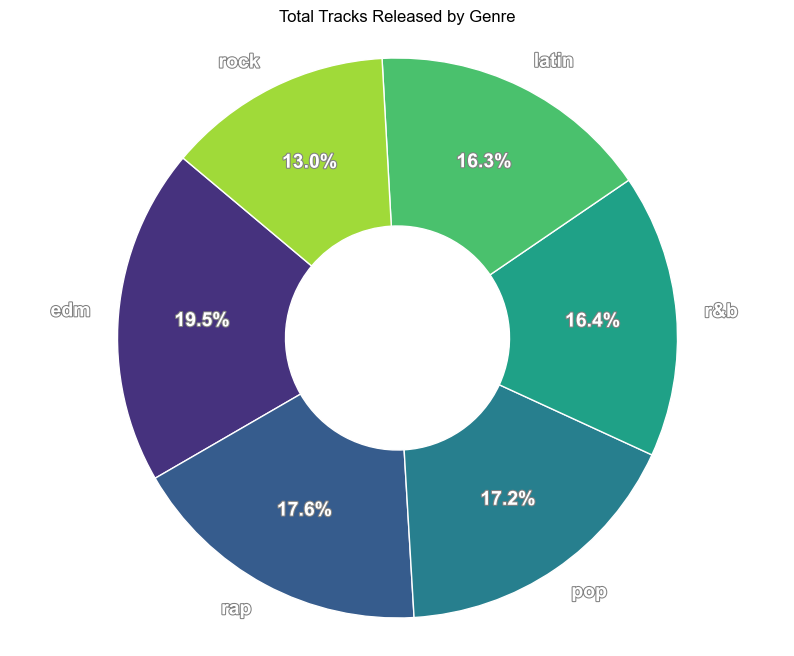

In [29]:
genre_counts = df['playlist_genre'].value_counts()

def add_outline(text, linewidth=1.5, foreground='grey'):
    text.set_path_effects([path_effects.Stroke(linewidth=linewidth, foreground=foreground), path_effects.Normal()])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,
                                  colors=sns.color_palette('viridis', len(genre_counts)),
                                  textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
                                  wedgeprops={'width': 0.6}, pctdistance=0.7)

# Add outline to the text
for text in texts + autotexts:
    add_outline(text)

plt.title('Total Tracks Released by Genre', color='black')
plt.axis('equal')
plt.show()

### Tempo Distribution by Year

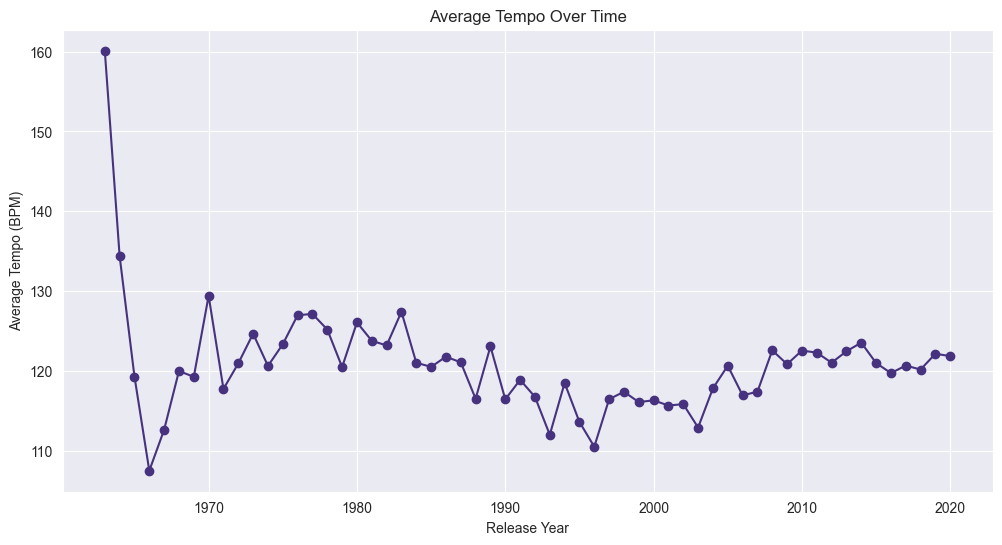

In [30]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

colors=sns.color_palette('viridis', len(genre_counts))

tempo_over_time = df.groupby(df['track_album_release_date'].dt.year)['tempo'].mean()

plt.figure(figsize=(12, 6))
tempo_over_time.plot(kind='line', marker='o', color=colors)
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Popularity Categories Distribution 

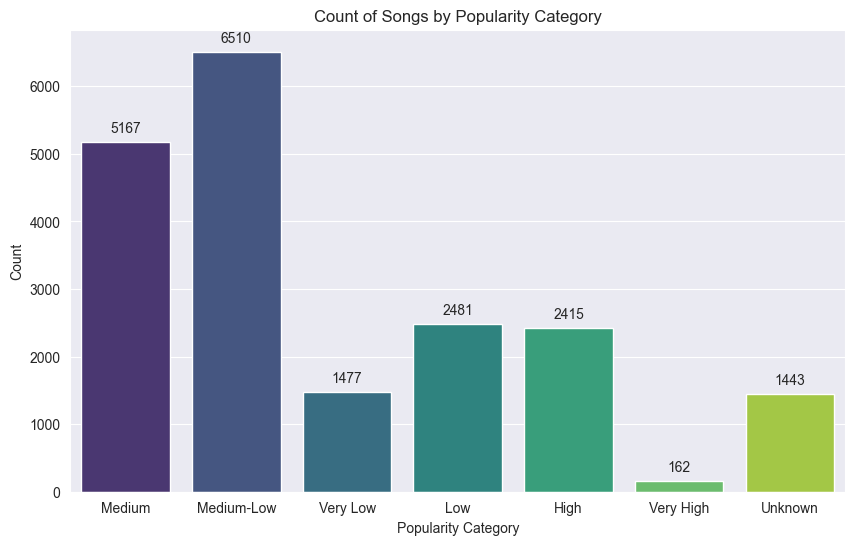

In [31]:
category_counts = df['popularity_category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='popularity_category', hue='popularity_category', palette=sns.color_palette('viridis', len(category_counts)))
plt.title('Count of Songs by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Tempo Categories Distribution

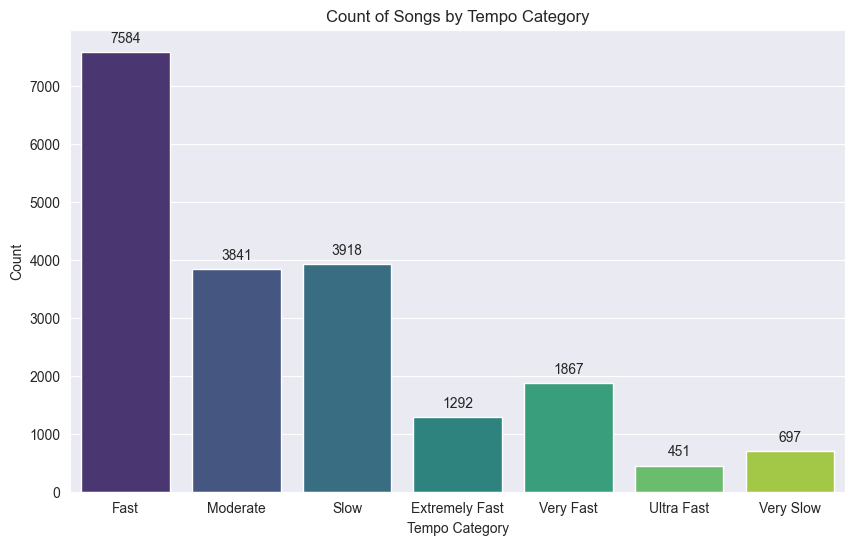

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tempo_category', hue='tempo_category', palette=sns.color_palette('viridis', len(category_counts)), legend=False)

plt.title('Count of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Loudness Categories Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_7104\877796392.py:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.countplot(data=df, x='loudness_category', hue="loudness_category", legend=False,  palette=sns.color_palette('viridis', len(category_counts)))


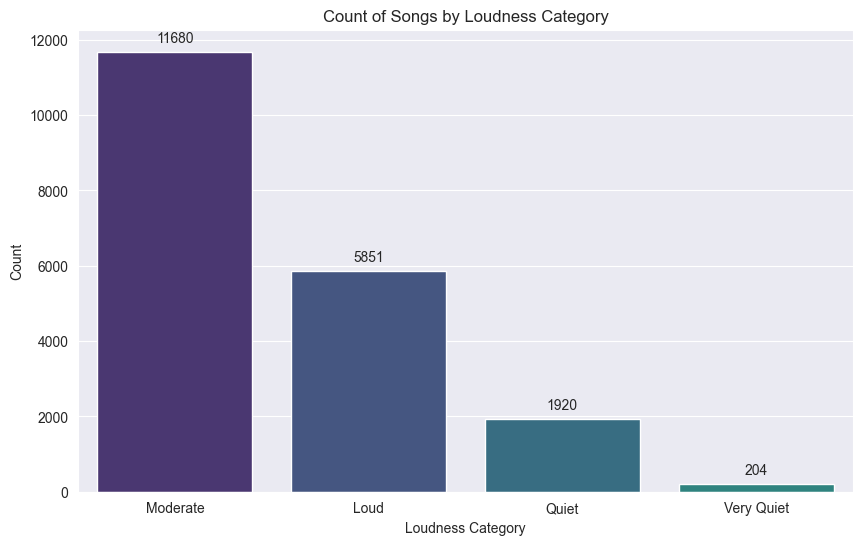

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='loudness_category', hue="loudness_category", legend=False,  palette=sns.color_palette('viridis', len(category_counts)))
plt.title('Count of Songs by Loudness Category')
plt.xlabel('Loudness Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()